<a href="https://colab.research.google.com/github/gmsj/Projeto-1-Ciencia-de-dados/blob/main/Projeto_1_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto 1 Ciência de Dados

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

###Coleta dos Dados



In [2]:
# Fonte: http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas
#dataframe = pd.read_csv("http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/2caa8f41-ccd9-4ea5-906d-f66017d6e107/download/acidentes2021.csv", encoding = "UTF-8", delimiter=';')

In [3]:
dataframe2018 = pd.read_csv("http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/2485590a-3b35-4ad0-b955-8dfc36b61021/download/acidentes_2018.csv", encoding = "UTF-8", delimiter=';')
dataframe2019 = pd.read_csv("http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/3531bafe-d47d-415e-b154-a881081ac76c/download/acidentes-2019.csv", encoding = "UTF-8", delimiter=';')
dataframe2020 = pd.read_csv("http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/fc1c8460-0406-4fff-b51a-e79205d1f1ab/download/acidentes_2020-novo.csv", encoding = "UTF-8", delimiter=';')
dataframe2021 = pd.read_csv("http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/2caa8f41-ccd9-4ea5-906d-f66017d6e107/download/acidentes2021.csv", encoding = "UTF-8", delimiter=';')

In [4]:
dataframe2018.drop(['endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento', 'descricao'], axis=1, inplace=True)
dataframe2019.drop(['endereco_cruzamento', 'numero_cruzamento', 'referencia_cruzamento', 'descricao'], axis=1, inplace=True)
dataframe2020.drop(['descricao'], axis=1, inplace=True)

dataframe2018.rename(columns={'DATA': 'data'}, inplace=True)
dataframe2019.rename(columns={'DATA': 'data'}, inplace=True)

In [5]:
dataframe = pd.concat([dataframe2018, dataframe2019, dataframe2020, dataframe2021], ignore_index=True)

###Pré-processamento dos Dados

Especificação:
* Definição	de	tipos
* Tratamento	de	dados	ausentes
* Normalização	e	discretização
* Limpeza	de	dados	(univariado,	bivariado	e	multivariado)

####Análise dos dados

In [6]:
dataframe

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2018-01-01,00:01:00,COM VÍTIMA,FINALIZADA,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,NaN,NaN,EM FRENTE AO CAIS JOSE ESTELITA,SÃO JOSÉ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,02:45:00,SEM VÍTIMA,CANCELADA,CORDEIRO,AV CAXANGA,NaN,NaN,"PROX DO GALETOS, EM FRENTE AO PARQUE DE EXPOSI...",CORDEIRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,03:33:00,SEM VÍTIMA,CANCELADA,BOA VIAGEM,AV CONSELHEIRO AGUIAR,NaN,NaN,"PROX DO BANCO DO BRASIL, PROX DO BANCO ITAÚ",BOA VIAGEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,07:13:00,SEM VÍTIMA,FINALIZADA,BAIRRO DO RECIFE,AV ALFREDO LISBOA,NaN,NaN,PROX AO POSTO DE GASOLINA BR AO LADO DO ARMAZE...,BAIRRO DO RECIFE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,07:50:00,SEM VÍTIMA,FINALIZADA,CASA AMARELA,RUA PADRE LEMOS,767,NaN,EM FRENTE AO POSTO PETROBRAS,CASA AMARELA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29940,2021-12-31,11:36:00,COM VÍTIMA,FINALIZADA,ESTÂNCIA,AV RECIFE,673,NaN,EM FRENTE AO LABORATORIO CERPE,ESTÂNCIA,...,Perfeito estado,Seca,Perfeito estado,Não existe,R-6a,NaN,Dupla,Faixa contínua,Faixa seccionada,Canteiro central
29941,2021-12-31,12:56:00,COM VÍTIMA,FINALIZADA,VÁRZEA,RUA GASTAO VIDIGAL,125,NaN,EM FRENTE AO MOTEL DO NINJA,VÁRZEA,...,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Faixa seccionada,NaN,NaN
29942,2021-12-31,15:00:00,COM VÍTIMA,FINALIZADA,TORREÃO,AV NORTE MIGUEL ARRAES DE ALENCAR,NaN,RUA NATIVIDADE SALDANHA,ACIDENTE COM VITÍMA NA PRAÇA DA PICANHA / SOLI...,TORREÃO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,60 km/h,Dupla,Faixa contínua,Faixa seccionada,Canteiro central
29943,2021-12-31,20:44:00,COM VÍTIMA,CANCELADA,PRADO,RUA PANDIA CALOGERAS,NaN,NaN,PROX AO HABIBIS,PRADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataframe.describe()

,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
count,27419.000000,9653.000000,2501.000000,2917.000000,2996.000000,6434.000000,5123.000000,2735.000000,2777.000000,29888.000000,2453.000000
mean,1.512273,0.967575,0.055978,0.239287,0.273364,0.667237,0.568222,0.176965,0.155203,0.307883,0.039951
std,0.667291,0.409539,0.229924,0.435472,0.482451,0.503146,0.521859,0.414773,0.381539,0.567369,0.197955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,9.000000,4.000000,1.000000,3.000000,5.000000,3.000000,2.000000,8.000000,3.000000,11.000000,2.000000


In [8]:
dataframe.dtypes

data                          object
hora                          object
natureza_acidente             object
situacao                      object
bairro                        object
endereco                      object
numero                        object
detalhe_endereco_acidente     object
complemento                   object
bairro_cruzamento             object
num_semaforo                  object
sentido_via                   object
tipo                          object
auto                         float64
moto                         float64
ciclom                       float64
ciclista                     float64
pedestre                     float64
onibus                       float64
caminhao                     float64
viatura                      float64
outros                       float64
vitimas                      float64
vitimasfatais                float64
acidente_verificado           object
tempo_clima                   object
situacao_semaforo             object
s

Checando os valores únicos dos campos 'object' para identificar possíveis campos categóricos

In [9]:
possible_categorical = dataframe.apply(lambda col: col.unique().tolist() if col.dtype == 'object' else col)

possible_categorical.to_frame().style

####Removendo colunas que não possuem informações tão úteis para análise

In [10]:
dataframe.drop(['endereco', 'numero', 'detalhe_endereco_acidente', 'complemento', 'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'velocidade_max_via', 'divisao_via2', 'divisao_via3'], axis=1, inplace=True)

####Definição de tipos

In [11]:
regex_pattern = '((?<!\d)[01]{1}?[0-9]|2[0-3]):[0-5][0-9]:[0-5][0-9]'

filter = dataframe['hora'].str.contains(regex_pattern, na=False)

dataframe = dataframe[filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dataframe['data'] = dataframe['data'].astype('datetime64')
dataframe['hora'] = dataframe['hora'].astype('datetime64')
dataframe['natureza_acidente'] = dataframe['natureza_acidente'].astype('category')
dataframe['situacao'] = dataframe['situacao'].astype('category')
dataframe['bairro'] = dataframe['bairro'].astype('category')
dataframe['tipo'] = dataframe['tipo'].astype('category')
dataframe['acidente_verificado'] = dataframe['acidente_verificado'].astype('category')
dataframe['tempo_clima'] = dataframe['tempo_clima'].astype('category')
dataframe['situacao_semaforo'] = dataframe['situacao_semaforo'].astype('category')
dataframe['sinalizacao'] = dataframe['sinalizacao'].astype('category')
dataframe['condicao_via'] = dataframe['condicao_via'].astype('category')
dataframe['conservacao_via'] = dataframe['conservacao_via'].astype('category')
dataframe['ponto_controle'] = dataframe['ponto_controle'].astype('category')
dataframe['situacao_placa'] = dataframe['situacao_placa'].astype('category')
dataframe['mao_direcao'] = dataframe['mao_direcao'].astype('category')
dataframe['divisao_via1'] = dataframe['divisao_via1'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [13]:
dataframe.dtypes

data                   datetime64[ns]
hora                   datetime64[ns]
natureza_acidente            category
situacao                     category
bairro                       category
tipo                         category
auto                          float64
moto                          float64
ciclom                        float64
ciclista                      float64
pedestre                      float64
onibus                        float64
caminhao                      float64
viatura                       float64
outros                        float64
vitimas                       float64
vitimasfatais                 float64
acidente_verificado          category
tempo_clima                  category
situacao_semaforo            category
sinalizacao                  category
condicao_via                 category
conservacao_via              category
ponto_controle               category
situacao_placa               category
mao_direcao                  category
divisao_via1

In [14]:
dataframe

,data,hora,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,...,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1
0,2018-01-01,2022-08-22 00:01:00,COM VÍTIMA,FINALIZADA,SÃO JOSÉ,ATROPELAMENTO,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,2022-08-22 02:45:00,SEM VÍTIMA,CANCELADA,CORDEIRO,COLISÃO,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2022-08-22 03:33:00,SEM VÍTIMA,CANCELADA,BOA VIAGEM,COLISÃO,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,2022-08-22 07:13:00,SEM VÍTIMA,FINALIZADA,BAIRRO DO RECIFE,COLISÃO,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,2022-08-22 07:50:00,SEM VÍTIMA,FINALIZADA,CASA AMARELA,COLISÃO,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29940,2021-12-31,2022-08-22 11:36:00,COM VÍTIMA,FINALIZADA,ESTÂNCIA,COLISÃO TRASEIRA,1.0,1.0,0.0,0.0,...,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,R-6a,Dupla,Faixa contínua
29941,2021-12-31,2022-08-22 12:56:00,COM VÍTIMA,FINALIZADA,VÁRZEA,COLISÃO FRONTAL,0.0,1.0,0.0,0.0,...,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa seccionada
29942,2021-12-31,2022-08-22 15:00:00,COM VÍTIMA,FINALIZADA,TORREÃO,COLISÃO TRASEIRA,2.0,0.0,0.0,0.0,...,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,Dupla,Faixa contínua
29943,2021-12-31,2022-08-22 20:44:00,COM VÍTIMA,CANCELADA,PRADO,COLISÃO FRONTAL,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
categories = dataframe.select_dtypes('category').apply(lambda col: col.cat.categories)
categories.to_frame().style

,0
natureza_acidente,"Index(['APOIO', 'COM VÍTIMA', 'ENTRADA E SAÍDA', 'OUTROS', 'SEM VÍTIMA', 'VÍTIMA FATAL'], dtype='object')"
situacao,"Index(['CANCELADA', 'DUPLICIDADE', 'EM ABERTO', 'EQUIPE EM DESLOCAMENTO', 'EQUIPE NO LOCAL', 'EVADIU-SE', 'FINALIZADA', 'PENDENTE'], dtype='object')"
bairro,"Index(['AFLITOS', 'AFOGADOS', 'ALTO DO MANDU', 'ALTO JOSÉ BONIFÁCIO', 'ALTO JOSÉ DO PINHO', 'ALTO SANTA TERESINHA', 'APIPUCOS', 'AREIAS', 'ARRUDA', 'BAIRRO DO RECIFE', 'BARRO', 'BEBERIBE', 'BOA VIAGEM', 'BOA VISTA', 'BOMBA DO HEMETERIO', 'BOMBA DO HEMETÉRIO', 'BONGI', 'BRASÍLIA TEIMOSA', 'BREJO DA GUABIRABA', 'BREJO DE BEBERIBE', 'CABANGA', 'CAJUEIRO', 'CAMPINA DO BARRETO', 'CAMPO GRANDE', 'CASA AMARELA', 'CASA FORTE', 'CAXANGÁ', 'CAÇOTE', 'CIDADE UNIVERSITÁRIA', 'COELHOS', 'COHAB', 'COQUEIRAL', 'CORDEIRO', 'CURADO', 'CÓRREGO DO JENIPAPO', 'DERBY', 'DOIS IRMÃOS', 'DOIS UNIDOS', 'ENCRUZILHADA', 'ENGENHO DO MEIO', 'ESPINHEIRO', 'ESTÂNCIA', 'FUNDÃO', 'GRAÇAS', 'GUABIRABA', 'HIPÓDROMO', 'IBURA', 'ILHA DO LEITE', 'ILHA DO RETIRO', 'ILHA JOANA BEZERRA', 'IMBIRIBEIRA', 'IPESEP', 'IPSEP', 'IPUTINGA', 'JAQUEIRA', 'JARDIM SÃO PAULO', 'JIQUIÁ', 'JOANA BEZERRA', 'JORDÃO', 'LINHA DO TIRO', 'MACAXEIRA', 'MADALENA', 'MANGABEIRA', 'MANGUEIRA', 'MONTEIRO', 'MORRO DA CONCEIÇÃO', 'MUSTARDINHA', 'NOVA DESCOBERTA', 'PAISSANDU', 'PARNAMIRIM', 'PASSARINHO', 'PINA', 'PONTO DE PARADA', 'PORTO DA MADEIRA', 'POÇO DA PANELA', 'PRADO', 'ROSARINHO', 'SAN MARTIN', 'SANCHO', 'SANTANA', 'SANTO AMARO', 'SANTO ANTÔNIO', 'SOLEDADE', 'SÃO JOSÉ', 'SÍTIO DOS PINTOS', 'TAMARINEIRA', 'TEJIPIÓ', 'TORRE', 'TORREÃO', 'TORRÕES', 'TOTÓ', 'VASCO DA GAMA', 'VÁRZEA', 'ZUMBI', 'ÁGUA FRIA'], dtype='object')"
tipo,"Index(['0', 'ABALROAMENTO LONGITUDINAL', 'ABALROAMENTO TRANSVERSAL', 'ACID. DE PERCURSO', 'ALAGAMENTO', 'APOIO COMPESA', 'ATROPELAMENTO', 'ATROPELAMENTO ANIMAL', 'ATROPELAMENTO DE ANIMAL', 'ATROPELAMENTO DE PESSOA', 'CAPOTAMENTO', 'CHOQUE', 'CHOQUE OBJETO FIXO', 'CHOQUE VEÍCULO PARADO', 'COLISÃO', 'COLISÃO COM CICLISTA', 'COLISÃO FRONTAL', 'COLISÃO LATERAL', 'COLISÃO TRANSVERSAL', 'COLISÃO TRASEIRA', 'ENGAVETAMENTO', 'MONITORAMENTO', 'OUTROS', 'OUTROS APOIOS', 'QUEDA', 'SANTO AMARO', 'SEMÁFORO', 'SUBURBIO', 'TOMBAMENTO'], dtype='object')"
acidente_verificado,"Index(['APÓS O TREVO', 'Cruzamento', 'Esquina', 'Longo da via', 'Não informado', 'Outros', 'Ponte', 'Rotatória', 'Viaduto'], dtype='object')"
tempo_clima,"Index(['Bom', 'Chuvoso', 'Nublado'], dtype='object')"
situacao_semaforo,"Index(['Com defeito', 'Desligado', 'Intermitente', 'Não existe', 'Sem defeito'], dtype='object')"
sinalizacao,"Index(['Ilegível', 'Incompleta', 'Não existente', 'Perfeito estado'], dtype='object')"
condicao_via,"Index(['Molhada', 'Oleosa', 'Outros', 'Seca'], dtype='object')"
conservacao_via,"Index(['Mal conservada', 'Mal iluminada', 'Não há', 'Outros', 'Perfeito estado'], dtype='object')"


####Tratamento de dados ausentes

In [16]:
#Verificando a quantidade de nulos
dataframe.isna().sum().to_frame().style

,0
data,0
hora,0
natureza_acidente,108
situacao,9
bairro,212
tipo,58
auto,2524
moto,20267
ciclom,27408
ciclista,26992


####Remoção de colunas com dados ausentes

In [17]:
target_columns = [
      'natureza_acidente', 'situacao', 'bairro', 'tipo', 'acidente_verificado',
      'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via', 
      'ponto_controle', 'situacao_placa', 'mao_direcao', 'divisao_via1'
]

In [18]:
clean_dataframe = dataframe.dropna(subset=target_columns).reset_index(drop=True)

In [19]:
results = clean_dataframe.apply(lambda col: col.unique().tolist() if col.name in target_columns else None).dropna()
results.to_frame().style

,0
natureza_acidente,"['SEM VÍTIMA', 'COM VÍTIMA', 'VÍTIMA FATAL', 'OUTROS']"
situacao,"['FINALIZADA', 'CANCELADA', 'EQUIPE EM DESLOCAMENTO', 'DUPLICIDADE', 'EQUIPE NO LOCAL', 'EM ABERTO', 'PENDENTE']"
bairro,"['TEJIPIÓ', 'IMBIRIBEIRA', 'CAMPO GRANDE', 'DERBY', 'GRAÇAS', 'SANTO AMARO', 'BOA VIAGEM', 'ÁGUA FRIA', 'IBURA', 'IPSEP', 'ESPINHEIRO', 'JARDIM SÃO PAULO', 'MADALENA', 'CASA FORTE', 'PARNAMIRIM', 'ILHA DO LEITE', 'AFOGADOS', 'PAISSANDU', 'MUSTARDINHA', 'PINA', 'TORRÕES', 'ROSARINHO', 'ILHA DO RETIRO', 'BEBERIBE', 'BARRO', 'CIDADE UNIVERSITÁRIA', 'PRADO', 'ESTÂNCIA', 'AREIAS', 'AFLITOS', 'ARRUDA', 'TAMARINEIRA', 'BAIRRO DO RECIFE', 'JAQUEIRA', 'SAN MARTIN', 'BONGI', 'CASA AMARELA', 'IPUTINGA', 'CAXANGÁ', 'ENCRUZILHADA', 'BOA VISTA', 'SÃO JOSÉ', 'VÁRZEA', 'BOMBA DO HEMETÉRIO', 'ILHA JOANA BEZERRA', 'COELHOS', 'MANGUEIRA', 'ENGENHO DO MEIO', 'NOVA DESCOBERTA', 'SOLEDADE', 'CABANGA', 'SANTO ANTÔNIO', 'DOIS UNIDOS', 'TORRE', 'TORREÃO', 'CORDEIRO', 'MACAXEIRA', 'HIPÓDROMO', 'JIQUIÁ', 'MANGABEIRA', 'DOIS IRMÃOS', 'JORDÃO', 'VASCO DA GAMA', 'LINHA DO TIRO', 'APIPUCOS', 'ALTO JOSÉ DO PINHO', 'BRASÍLIA TEIMOSA', 'COQUEIRAL', 'ZUMBI', 'JOANA BEZERRA', 'CAÇOTE', 'CAJUEIRO', 'FUNDÃO', 'SANCHO', 'MONTEIRO', 'TOTÓ', 'PONTO DE PARADA', 'GUABIRABA', 'ALTO DO MANDU', 'PORTO DA MADEIRA', 'CAMPINA DO BARRETO', 'SANTANA', 'POÇO DA PANELA', 'ALTO JOSÉ BONIFÁCIO', 'MORRO DA CONCEIÇÃO', 'CÓRREGO DO JENIPAPO', 'PASSARINHO', 'BREJO DA GUABIRABA', 'SÍTIO DOS PINTOS', 'CURADO', 'BREJO DE BEBERIBE', 'COHAB', 'ALTO SANTA TERESINHA', 'BOMBA DO HEMETERIO']"
tipo,"['COLISÃO TRASEIRA', 'ABALROAMENTO LONGITUDINAL', 'CHOQUE VEÍCULO PARADO', 'ABALROAMENTO TRANSVERSAL', 'CAPOTAMENTO', 'COLISÃO FRONTAL', 'COLISÃO COM CICLISTA', 'ATROPELAMENTO', 'CHOQUE OBJETO FIXO', 'ACID. DE PERCURSO', 'CHOQUE', 'COLISÃO', 'TOMBAMENTO', 'ATROPELAMENTO ANIMAL', 'ENGAVETAMENTO', 'COLISÃO LATERAL', 'COLISÃO TRANSVERSAL', 'ATROPELAMENTO DE PESSOA', 'QUEDA', 'ATROPELAMENTO DE ANIMAL', 'OUTROS']"
acidente_verificado,"['Longo da via', 'Outros', 'Cruzamento', 'Ponte', 'Viaduto', 'Esquina', 'Não informado', 'Rotatória']"
tempo_clima,"['Bom', 'Chuvoso', 'Nublado']"
situacao_semaforo,"['Não existe', 'Sem defeito', 'Intermitente', 'Com defeito', 'Desligado']"
sinalizacao,"['Não existente', 'Perfeito estado', 'Ilegível', 'Incompleta']"
condicao_via,"['Seca', 'Molhada', 'Outros', 'Oleosa']"
conservacao_via,"['Perfeito estado', 'Mal iluminada', 'Mal conservada', 'Não há', 'Outros']"


In [20]:
clean_dataframe

,data,hora,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,...,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1
0,2018-10-12,2022-08-22 11:32:00,SEM VÍTIMA,FINALIZADA,TEJIPIÓ,COLISÃO TRASEIRA,2.0,NaN,NaN,NaN,...,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa contínua
1,2018-10-12,2022-08-22 12:50:00,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,ABALROAMENTO LONGITUDINAL,NaN,NaN,NaN,NaN,...,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Canteiro central
2,2018-10-12,2022-08-22 13:23:00,SEM VÍTIMA,FINALIZADA,CAMPO GRANDE,CHOQUE VEÍCULO PARADO,2.0,NaN,NaN,NaN,...,Outros,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Única,Não existe
3,2018-10-12,2022-08-22 17:53:00,SEM VÍTIMA,FINALIZADA,DERBY,ABALROAMENTO LONGITUDINAL,1.0,NaN,NaN,NaN,...,Outros,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,"Placas ""Pare""",Única,Não existe
4,2018-10-12,2022-08-22 18:25:00,SEM VÍTIMA,FINALIZADA,GRAÇAS,ABALROAMENTO LONGITUDINAL,1.0,1.0,NaN,NaN,...,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Única,Faixa seccionada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,2021-12-30,2022-08-22 12:34:00,COM VÍTIMA,FINALIZADA,PINA,COLISÃO LATERAL,1.0,1.0,0.0,0.0,...,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Única,Não existe
12261,2021-12-31,2022-08-22 10:13:00,COM VÍTIMA,FINALIZADA,SAN MARTIN,COLISÃO COM CICLISTA,1.0,0.0,0.0,1.0,...,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Não existe
12262,2021-12-31,2022-08-22 11:36:00,COM VÍTIMA,FINALIZADA,ESTÂNCIA,COLISÃO TRASEIRA,1.0,1.0,0.0,0.0,...,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,R-6a,Dupla,Faixa contínua
12263,2021-12-31,2022-08-22 12:56:00,COM VÍTIMA,FINALIZADA,VÁRZEA,COLISÃO FRONTAL,0.0,1.0,0.0,0.0,...,Cruzamento,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa seccionada


####Imputação de dados ausentes

In [21]:
clean_dataframe.isna().sum().to_frame().style

,0
data,0
hora,0
natureza_acidente,0
situacao,0
bairro,0
tipo,0
auto,1007
moto,7614
ciclom,10814
ciclista,10572


In [22]:
#clean_dataframe['auto'] = clean_dataframe['auto'].fillna(0)
results = clean_dataframe.apply(lambda col: col.fillna(0) if col.dtype == float else col)
results.isna().sum().to_frame().style
#clean_dataframe = clean_dataframe.select_dtypes(float).apply(lambda col: col.fillna(0))

,0
data,0
hora,0
natureza_acidente,0
situacao,0
bairro,0
tipo,0
auto,0
moto,0
ciclom,0
ciclista,0


In [23]:
results.head().style

,data,hora,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1
0,2018-10-12 00:00:00,2022-08-22 11:32:00,SEM VÍTIMA,FINALIZADA,TEJIPIÓ,COLISÃO TRASEIRA,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa contínua
1,2018-10-12 00:00:00,2022-08-22 12:50:00,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,ABALROAMENTO LONGITUDINAL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Canteiro central
2,2018-10-12 00:00:00,2022-08-22 13:23:00,SEM VÍTIMA,FINALIZADA,CAMPO GRANDE,CHOQUE VEÍCULO PARADO,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Única,Não existe
3,2018-10-12 00:00:00,2022-08-22 17:53:00,SEM VÍTIMA,FINALIZADA,DERBY,ABALROAMENTO LONGITUDINAL,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,"Placas ""Pare""",Única,Não existe
4,2018-10-12 00:00:00,2022-08-22 18:25:00,SEM VÍTIMA,FINALIZADA,GRAÇAS,ABALROAMENTO LONGITUDINAL,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Única,Faixa seccionada


####Remoção de outliers

#####Tratamento do dataset para poder aplicar os métodos

In [24]:
dataframeCodes = results.copy()

In [25]:
dataframeCodes.drop(['data', 'hora'], axis=1, inplace=True)

In [26]:
dataframeCodes.head().style

,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1
0,SEM VÍTIMA,FINALIZADA,TEJIPIÓ,COLISÃO TRASEIRA,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa contínua
1,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,ABALROAMENTO LONGITUDINAL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Canteiro central
2,SEM VÍTIMA,FINALIZADA,CAMPO GRANDE,CHOQUE VEÍCULO PARADO,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Única,Não existe
3,SEM VÍTIMA,FINALIZADA,DERBY,ABALROAMENTO LONGITUDINAL,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,"Placas ""Pare""",Única,Não existe
4,SEM VÍTIMA,FINALIZADA,GRAÇAS,ABALROAMENTO LONGITUDINAL,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Única,Faixa seccionada


In [27]:
dataframeCodes['natureza_acidente'] = dataframeCodes['natureza_acidente'].cat.codes
dataframeCodes['situacao'] = dataframeCodes['situacao'].cat.codes
dataframeCodes['bairro'] = dataframeCodes['bairro'].cat.codes
dataframeCodes['tipo'] = dataframeCodes['tipo'].cat.codes
dataframeCodes['acidente_verificado'] = dataframeCodes['acidente_verificado'].cat.codes
dataframeCodes['tempo_clima'] = dataframeCodes['tempo_clima'].cat.codes
dataframeCodes['situacao_semaforo'] = dataframeCodes['situacao_semaforo'].cat.codes
dataframeCodes['sinalizacao'] = dataframeCodes['sinalizacao'].cat.codes
dataframeCodes['condicao_via'] = dataframeCodes['condicao_via'].cat.codes
dataframeCodes['conservacao_via'] = dataframeCodes['conservacao_via'].cat.codes
dataframeCodes['ponto_controle'] = dataframeCodes['ponto_controle'].cat.codes
dataframeCodes['situacao_placa'] = dataframeCodes['situacao_placa'].cat.codes
dataframeCodes['mao_direcao'] = dataframeCodes['mao_direcao'].cat.codes
dataframeCodes['divisao_via1'] = dataframeCodes['divisao_via1'].cat.codes

#####Isolation Forests

In [28]:
dataframeTest = dataframeCodes.copy()

In [29]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(dataframeTest)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7F06EB4C26B0)

In [30]:
scores = clf.predict(dataframeTest)
print(scores)

[1 1 1 ... 1 1 1]


In [31]:
dataframeTest['outlier'] = scores
dataframeTest.head().style

,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1,outlier
0,4,6,86,19,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,3,2,3,4,3,1,0,6,1
1,4,6,50,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3,0,3,3,3,4,3,1,0,3,1
2,4,6,23,13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0,3,2,3,4,3,1,2,8,1
3,4,6,35,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0,3,3,3,4,3,6,2,8,1
4,4,6,43,1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,4,3,3,4,3,1,2,7,1


In [32]:
dataframeTest[dataframeTest['outlier'] == -1]

,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,...,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1,outlier
29,4,6,71,19,2.0,0.0,0.0,0.0,0.0,0.0,...,0,4,0,3,4,1,1,2,3,-1
64,4,6,12,19,1.0,1.0,0.0,0.0,0.0,1.0,...,0,3,3,3,4,3,1,2,7,-1
80,1,6,7,15,1.0,0.0,0.0,1.0,0.0,0.0,...,0,3,3,3,4,3,4,0,3,-1
86,1,6,26,6,0.0,1.0,0.0,0.0,1.0,0.0,...,0,4,3,3,4,1,4,0,3,-1
89,1,6,40,15,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,3,3,4,3,36,0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12249,1,6,12,18,1.0,1.0,0.0,0.0,0.0,0.0,...,1,4,3,0,4,2,1,2,7,-1
12250,1,6,85,18,1.0,0.0,0.0,0.0,0.0,1.0,...,1,4,3,0,4,1,4,0,3,-1
12251,1,6,90,16,1.0,1.0,0.0,0.0,0.0,0.0,...,1,3,1,0,4,3,1,0,8,-1
12254,1,6,94,9,0.0,0.0,0.0,0.0,1.0,1.0,...,0,3,3,3,4,1,24,0,6,-1


In [33]:
dataframeTest = dataframeTest[dataframeTest['outlier'] != -1]
len(dataframeTest)

10102

#####Elliptic Envelope

In [34]:
dataframeTest = dataframeCodes.copy()

In [35]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(dataframeTest)

EllipticEnvelope(contamination=0.01)

In [36]:
scores = detector.predict(dataframeTest)
print(scores)

[1 1 1 ... 1 1 1]


In [37]:
dataframeTest['outlier'] = scores
dataframeTest.head().style

,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1,outlier
0,4,6,86,19,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,3,2,3,4,3,1,0,6,1
1,4,6,50,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3,0,3,3,3,4,3,1,0,3,1
2,4,6,23,13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0,3,2,3,4,3,1,2,8,1
3,4,6,35,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,0,3,3,3,4,3,6,2,8,1
4,4,6,43,1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,4,3,3,4,3,1,2,7,1


In [38]:
dataframeTest[dataframeTest['outlier'] == -1]

,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,...,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1,outlier
35,4,6,46,1,2.0,0.0,0.0,0.0,0.0,0.0,...,0,4,3,3,4,1,4,0,6,-1
64,4,6,12,19,1.0,1.0,0.0,0.0,0.0,1.0,...,0,3,3,3,4,3,1,2,7,-1
290,4,6,12,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,3,3,4,3,1,2,7,-1
434,5,6,77,2,2.0,0.0,0.0,0.0,0.0,0.0,...,0,4,3,3,4,1,1,0,3,-1
452,4,6,52,19,1.0,0.0,0.0,0.0,0.0,0.0,...,0,4,3,3,4,1,4,0,7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,5,6,26,15,1.0,0.0,0.0,1.0,0.0,0.0,...,0,3,3,3,4,3,1,0,3,-1
12053,5,6,53,9,1.0,0.0,0.0,0.0,3.0,0.0,...,0,2,3,3,4,1,1,0,7,-1
12165,5,6,36,18,0.0,1.0,0.0,0.0,0.0,0.0,...,0,3,3,3,0,3,31,0,6,-1
12176,1,6,80,19,0.0,0.0,0.0,0.0,0.0,2.0,...,0,4,3,3,4,1,24,0,3,-1


In [39]:
dataframeTest = dataframeTest[dataframeTest['outlier'] != -1]
len(dataframeTest)

12142

####Normalização

In [40]:
columns = ['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']

dist = np.linalg.norm(results[columns].values[1]-results[columns].values[2])
print(dist)

2.449489742783178


In [41]:
results[columns].head().style

,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
houses_norm = (results[columns] - results[columns].min()) / (results[columns].max() - results[columns].min())
houses_norm.head().style

,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
2,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.166667,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.166667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
dist = np.linalg.norm(houses_norm.values[1]-houses_norm.values[2])
print(dist)

0.7817359599705717


####Discretização

In [44]:
#Discretizando em quantis
pd.qcut(results['data'],4).value_counts()

(2019-09-22, 2020-02-15]                       3077
(2018-01-02 23:59:59.999999999, 2019-04-01]    3071
(2019-04-01, 2019-09-22]                       3064
(2020-02-15, 2021-12-31]                       3053
Name: data, dtype: int64

In [45]:
#Discretizando por ano
pd.cut(results['data'],4).value_counts()

(2019-01-02 12:00:00, 2020-01-02]                    6854
(2020-01-02, 2020-12-31 12:00:00]                    2547
(2018-01-01 13:00:28.800000, 2019-01-02 12:00:00]    1459
(2020-12-31 12:00:00, 2021-12-31]                    1405
Name: data, dtype: int64

In [46]:
#Discretizando por semestre
pd.cut(results['data'],8).value_counts()

(2019-07-03 18:00:00, 2020-01-02]                    3603
(2019-01-02 12:00:00, 2019-07-03 18:00:00]           3251
(2020-01-02, 2020-07-02 06:00:00]                    1745
(2018-07-04 06:00:00, 2019-01-02 12:00:00]           1458
(2020-07-02 06:00:00, 2020-12-31 12:00:00]            802
(2021-07-01 18:00:00, 2021-12-31]                     794
(2020-12-31 12:00:00, 2021-07-01 18:00:00]            611
(2018-01-01 13:00:28.800000, 2018-07-04 06:00:00]       1
Name: data, dtype: int64

In [47]:
#Discretizando por trimestre
pd.cut(results['data'],16).value_counts()

(2019-10-02 21:00:00, 2020-01-02]                    1959
(2019-01-02 12:00:00, 2019-04-03 15:00:00]           1646
(2019-07-03 18:00:00, 2019-10-02 21:00:00]           1644
(2019-04-03 15:00:00, 2019-07-03 18:00:00]           1605
(2020-01-02, 2020-04-02 03:00:00]                    1484
(2018-10-03 09:00:00, 2019-01-02 12:00:00]           1458
(2020-10-01 09:00:00, 2020-12-31 12:00:00]            430
(2021-09-30 21:00:00, 2021-12-31]                     425
(2020-07-02 06:00:00, 2020-10-01 09:00:00]            372
(2021-07-01 18:00:00, 2021-09-30 21:00:00]            369
(2020-12-31 12:00:00, 2021-04-01 15:00:00]            329
(2021-04-01 15:00:00, 2021-07-01 18:00:00]            282
(2020-04-02 03:00:00, 2020-07-02 06:00:00]            261
(2018-01-01 13:00:28.800000, 2018-04-04 03:00:00]       1
(2018-04-04 03:00:00, 2018-07-04 06:00:00]              0
(2018-07-04 06:00:00, 2018-10-03 09:00:00]              0
Name: data, dtype: int64

In [48]:
#Discretizando por bimestre
pd.cut(results['data'],24).value_counts()

(2019-11-02 06:00:00, 2020-01-02]                    1330
(2018-11-02 18:00:00, 2019-01-02 12:00:00]           1256
(2019-09-02 12:00:00, 2019-11-02 06:00:00]           1215
(2020-01-02, 2020-03-02 18:00:00]                    1199
(2019-03-04 06:00:00, 2019-05-04]                    1167
(2019-01-02 12:00:00, 2019-03-04 06:00:00]           1064
(2019-07-03 18:00:00, 2019-09-02 12:00:00]           1058
(2019-05-04, 2019-07-03 18:00:00]                    1020
(2020-03-02 18:00:00, 2020-05-02 12:00:00]            339
(2020-10-31 18:00:00, 2020-12-31 12:00:00]            307
(2021-08-31 12:00:00, 2021-10-31 06:00:00]            281
(2021-10-31 06:00:00, 2021-12-31]                     267
(2020-07-02 06:00:00, 2020-09-01]                     254
(2020-12-31 12:00:00, 2021-03-02 06:00:00]            249
(2021-07-01 18:00:00, 2021-08-31 12:00:00]            246
(2020-09-01, 2020-10-31 18:00:00]                     241
(2020-05-02 12:00:00, 2020-07-02 06:00:00]            207
(2018-09-03, 2

In [49]:
#Discertizando por mês
pd.cut(results['data'],48).value_counts()

(2019-12-02 15:00:00, 2020-01-02]                    679
(2019-11-02 06:00:00, 2019-12-02 15:00:00]           651
(2018-11-02 18:00:00, 2018-12-03 03:00:00]           646
(2019-10-02 21:00:00, 2019-11-02 06:00:00]           629
(2020-02-01 09:00:00, 2020-03-02 18:00:00]           619
(2018-12-03 03:00:00, 2019-01-02 12:00:00]           610
(2019-09-02 12:00:00, 2019-10-02 21:00:00]           586
(2019-04-03 15:00:00, 2019-05-04]                    585
(2019-03-04 06:00:00, 2019-04-03 15:00:00]           582
(2020-01-02, 2020-02-01 09:00:00]                    580
(2019-02-01 21:00:00, 2019-03-04 06:00:00]           572
(2019-08-03 03:00:00, 2019-09-02 12:00:00]           551
(2019-06-03 09:00:00, 2019-07-03 18:00:00]           535
(2019-07-03 18:00:00, 2019-08-03 03:00:00]           507
(2019-01-02 12:00:00, 2019-02-01 21:00:00]           492
(2019-05-04, 2019-06-03 09:00:00]                    485
(2020-03-02 18:00:00, 2020-04-02 03:00:00]           285
(2018-10-03 09:00:00, 2018-11-0

###Estatísticas descritivas dos dados

####Criação da coluna contento o dia da semana

In [50]:
results['dia_semana'] = results['data'].dt.day_name()
results.head().style

,data,hora,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1,dia_semana
0,2018-10-12 00:00:00,2022-08-22 11:32:00,SEM VÍTIMA,FINALIZADA,TEJIPIÓ,COLISÃO TRASEIRA,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Faixa contínua,Friday
1,2018-10-12 00:00:00,2022-08-22 12:50:00,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,ABALROAMENTO LONGITUDINAL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,Longo da via,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Dupla,Canteiro central,Friday
2,2018-10-12 00:00:00,2022-08-22 13:23:00,SEM VÍTIMA,FINALIZADA,CAMPO GRANDE,CHOQUE VEÍCULO PARADO,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Única,Não existe,Friday
3,2018-10-12 00:00:00,2022-08-22 17:53:00,SEM VÍTIMA,FINALIZADA,DERBY,ABALROAMENTO LONGITUDINAL,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Outros,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,"Placas ""Pare""",Única,Não existe,Friday
4,2018-10-12 00:00:00,2022-08-22 18:25:00,SEM VÍTIMA,FINALIZADA,GRAÇAS,ABALROAMENTO LONGITUDINAL,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Única,Faixa seccionada,Friday


In [51]:
results.groupby('dia_semana').count()

,data,hora,natureza_acidente,situacao,bairro,tipo,auto,moto,ciclom,ciclista,...,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,mao_direcao,divisao_via1
dia_semana,,,,,,,,,,,,,,,,,,,,,
Friday,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025,...,2025,2025,2025,2025,2025,2025,2025,2025,2025,2025
Monday,1957,1957,1957,1957,1957,1957,1957,1957,1957,1957,...,1957,1957,1957,1957,1957,1957,1957,1957,1957,1957
Saturday,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
Sunday,988,988,988,988,988,988,988,988,988,988,...,988,988,988,988,988,988,988,988,988,988
Thursday,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
Tuesday,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,...,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998
Wednesday,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,...,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938


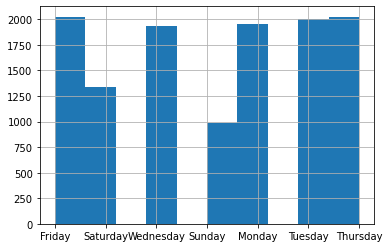

In [52]:
results['dia_semana'].hist()

####Contagem de acidentes por dia da semana

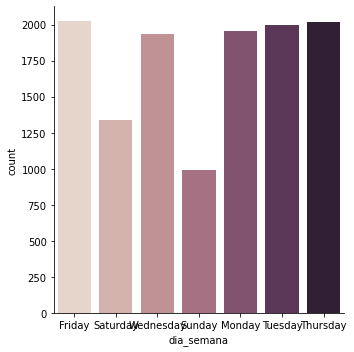

In [53]:
sns.catplot(x='dia_semana', kind="count", palette="ch:.15", data=results)

Com a visualização acima podemos perceber que os finais de semana são os dias em que ocorrem menos acidentes

####Contagem de acidentes de acordo com as condições climáticas

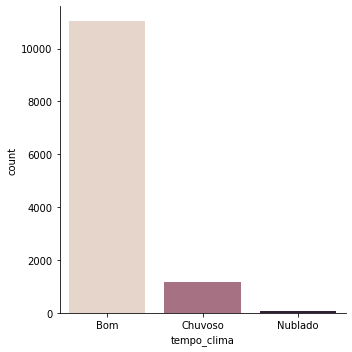

In [54]:
sns.catplot(x='tempo_clima', kind="count", palette="ch:.15", data=results)

Podemos concluir que ocorrem muito mais acidentes nos dias em que as condições climáticas estão boas

####Agrupamento de acidentes em dias da semana com separação em subgrupos do clima

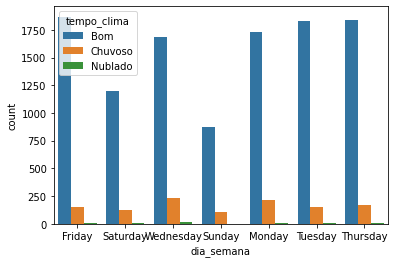

In [55]:
sns.countplot(x='dia_semana', hue='tempo_clima', data=results)

####Agrupamento da quantidade de acidentes por bairro

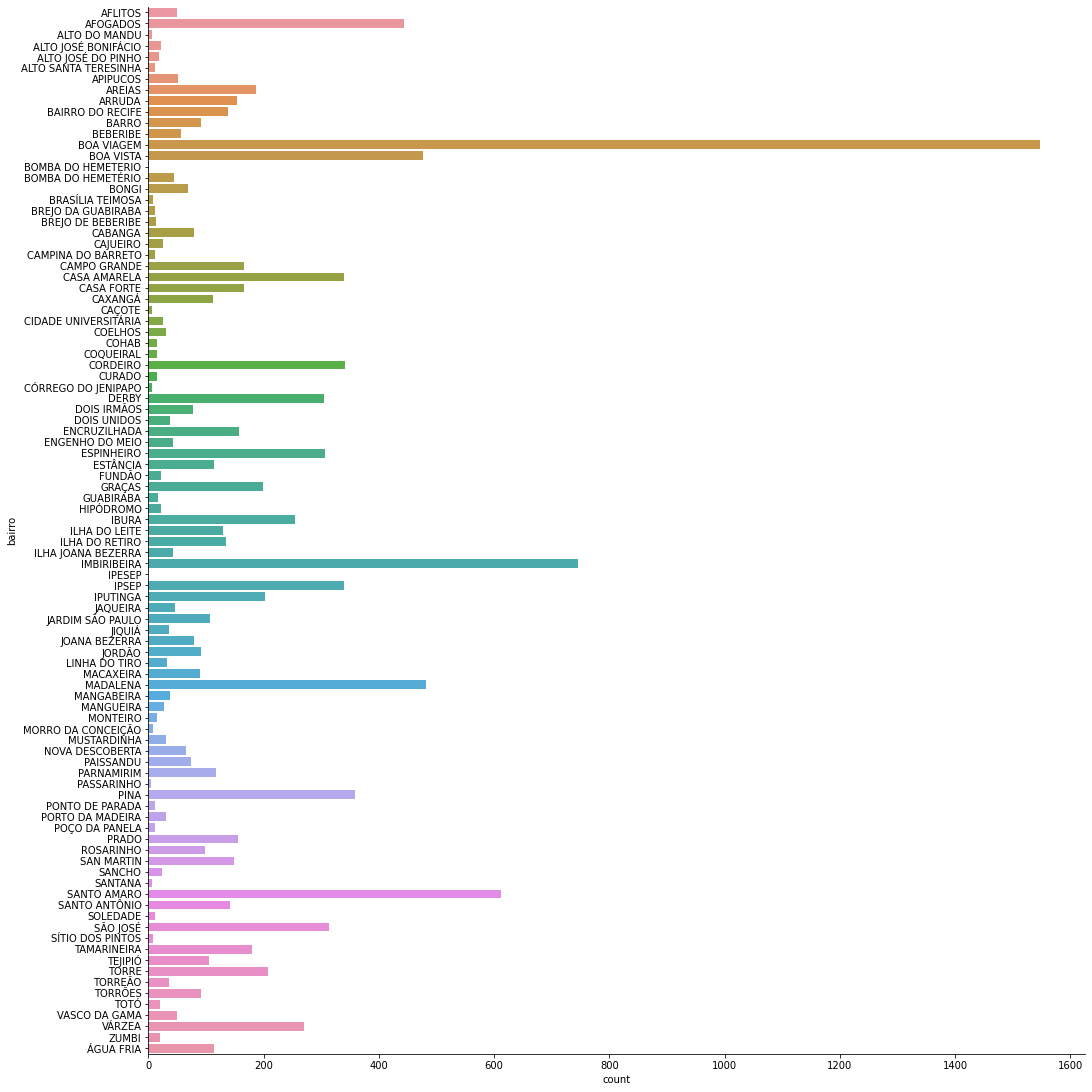

In [56]:
sns.catplot(y='bairro', kind="count", data=results, height=15.27)

###Testes de Hipótese

####O número de acidentes no bairro da Várzea é maior nos fim de semana?

In [57]:
weekend = results[(results['bairro'] == 'VÁRZEA') & ((results['dia_semana'] == 'Saturday') | (results['dia_semana'] == 'Sunday'))]['data'].to_numpy()
workday = results[(results['bairro'] == 'VÁRZEA') & ((results['dia_semana'] != 'Saturday') & (results['dia_semana'] != 'Sunday'))]['data'].to_numpy()

stat, p = stats.mannwhitneyu(weekend, workday)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=6147.000, p=0.885


####Teste de normalidade

In [58]:
stat, p = stats.shapiro(weekend)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.864, p=0.000


In [59]:
stat, p = stats.shapiro(workday)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.929, p=0.000


####O número de vítimas em acidentes em Boa Viagem é maior que o do resto de Recife?

In [60]:
vitimas_bv = results[(results['bairro'] == 'BOA VIAGEM')]['vitimas'].to_numpy()
vitimas_pe = results[(results['bairro'] != 'BOA VIAGEM')]['vitimas'].to_numpy()

stat, p = stats.mannwhitneyu(vitimas_bv, vitimas_pe)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=7722840.500, p=0.000
